# *Adidas Sales Analysis - Python & Power BI*

## 1. *Importing The Libraries*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st
import warnings
warnings.filterwarnings('ignore')

## *2. Loading The Dataset*

In [2]:
df = pd.read_excel('adidas_sales.xlsx')

In [3]:
df.head()

,Retailer,Invoice_Date,Region,State,City,Product,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin,Sales_Method
0,Foot Locker,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Invoice Date      9648 non-null   datetime64[ns]
 2   Region            9648 non-null   object        
 3   State             9648 non-null   object        
 4   City              9648 non-null   object        
 5   Product           9648 non-null   object        
 6   Price per Unit    9648 non-null   float64       
 7   Units Sold        9648 non-null   int64         
 8   Total Sales       9648 non-null   float64       
 9   Operating Profit  9648 non-null   float64       
 10  Operating Margin  9648 non-null   float64       
 11  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(6)
memory usage: 904.6+ KB


## *3. Data Cleaning*

In [24]:
# drop columns

df = df.drop(columns = ['Unnamed: 0', 'Retailer ID'], axis = 1)

In [4]:
# check for null values
df.isna().sum()

Retailer            0
Invoice_Date        0
Region              0
State               0
City                0
Product             0
Price_per_Unit      0
Units_Sold          0
Total_Sales         0
Operating_Profit    0
Operating_Margin    0
Sales_Method        0
dtype: int64

In [22]:
# Check for duplicated values

print(df.duplicated().sum())

0


In [27]:
# Rename Columns
df = df.rename(columns = {
    'Invoice Date' : 'Invoice_Date',
    'Price per Unit' : 'Price_per_Unit',
    'Units Sold' : 'Units_Sold',
    'Total Sales' : 'Total_Sales',
    'Operating Profit' : 'Operating_Profit',
    'Operating Margin' : 'Operating_Margin',
    'Sales Method' : 'Sales_Method'
})

In [28]:
df.describe().select_dtypes(include = ['int64', 'float64'])

,Price_per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin
count,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,45.216625,256.930037,93273.437500,34425.244761,0.422991
min,7.000000,0.000000,0.000000,0.000000,0.100000
25%,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,14.705397,214.252030,141916.016727,54193.113713,0.097197


## *4. Exploratory Data Analysis (EDA)*

#### 4.1 Correlation Heatmap

In [19]:
correlation = df.select_dtypes(include = ['int64', 'float64']).corr()

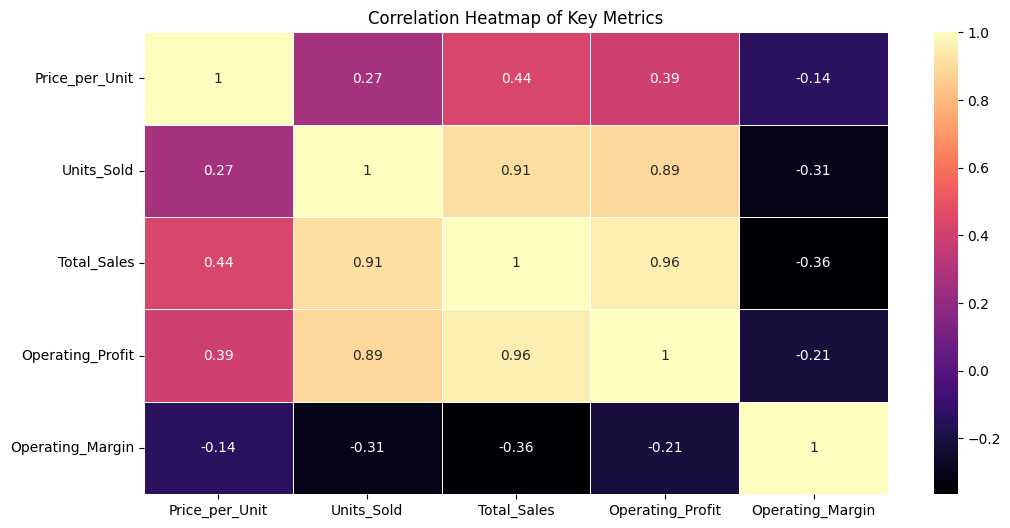

In [20]:
plt.figure(figsize = (12, 6))
sns.heatmap(correlation, annot = True, cmap = 'magma', linewidths = 0.5)
plt.title("Correlation Heatmap of Key Metrics")
plt.show()

#### 4.1 Monthly Sales Trends for Each Products

In [17]:
# extract year-month from date
df['Month'] = df['Invoice_Date'].dt.to_period('M')

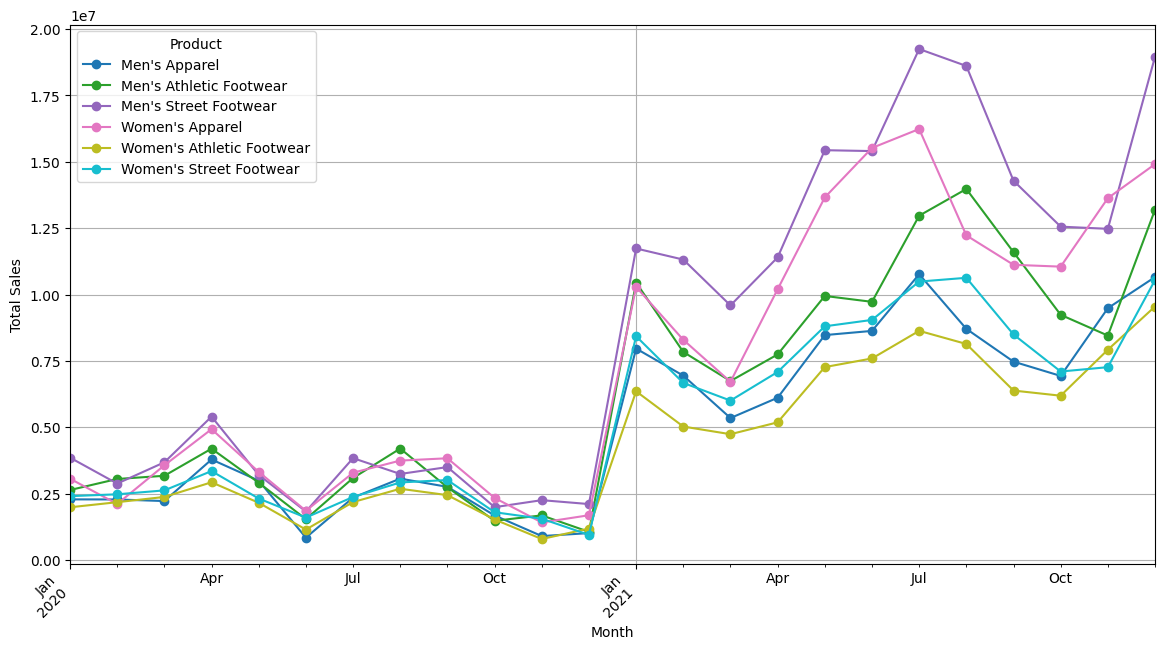

In [18]:
plt.figure(figsize = (14, 7))
monthly_sales = df.groupby(['Month', 'Product'])['Total_Sales'].sum().unstack()
monthly_sales.plot(marker = 'o', linestyle = '-', colormap='tab10', ax = plt.gca())
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation = 45, ha = 'right')
#plt.legend(title="Product", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

---

#### 4.2 Total Sales for Each Product

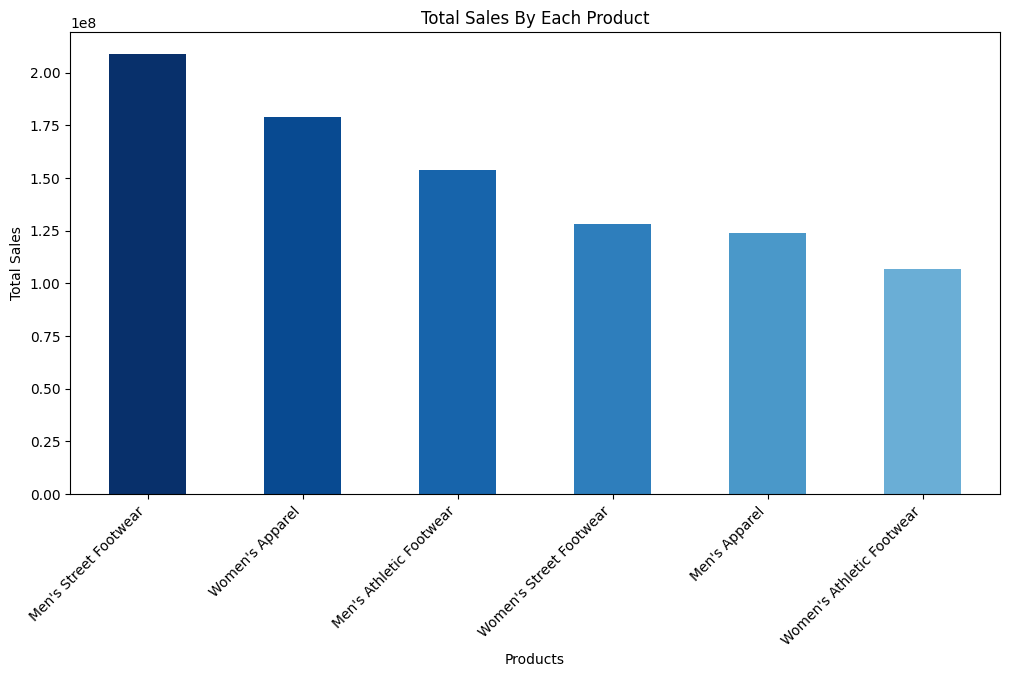

In [15]:
top_product = df.groupby('Product')['Total_Sales'].sum().sort_values(ascending = False)

plt.figure(figsize = (12, 6))
top_product.plot(kind = 'bar', y = 'Total_Sales', color =  plt.cm.Blues(np.linspace(1, 0.5, 6)))
plt.xlabel('Products')
plt.ylabel('Total Sales')
plt.title('Total Sales By Each Product')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

---

#### 4.3 Total Sales By Region

In [5]:
region_sales = df.groupby('Region')['Total_Sales'].sum().sort_values(ascending = False).reset_index()

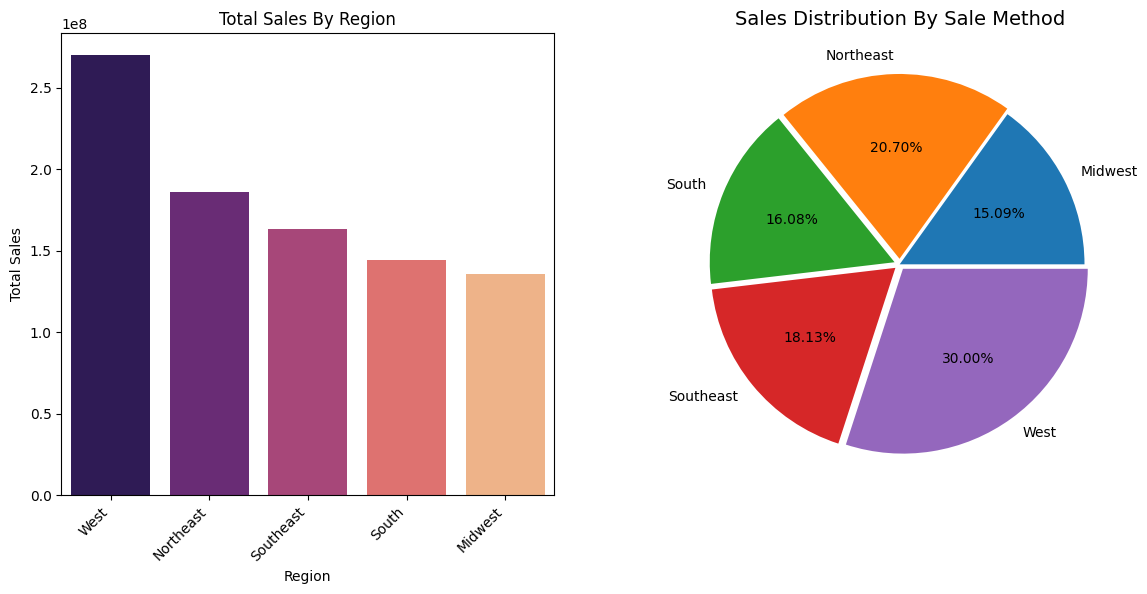

In [34]:
plt.figure(figsize = (14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x = 'Region', y = 'Total_Sales', data = region_sales, palette="magma")
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales By Region')
plt.xticks(rotation = 45, ha = 'right')

#pie Chart
plt.subplot(1, 2, 2)
Totalsales = df.groupby('Region')['Total_Sales'].sum()
Totalsales.plot(kind = 'pie', autopct='%1.2f%%', explode = [0, 0.03, 0.03,0.03,0.03])
plt.title('Sales Distribution By Sale Method', fontsize = 14)
plt.ylabel('')
plt.show()


---

#### 4.4 Total Sales by Retailer

In [7]:
sales_by_retailer = df.groupby('Retailer')['Total_Sales'].sum().sort_values(ascending = False).reset_index()

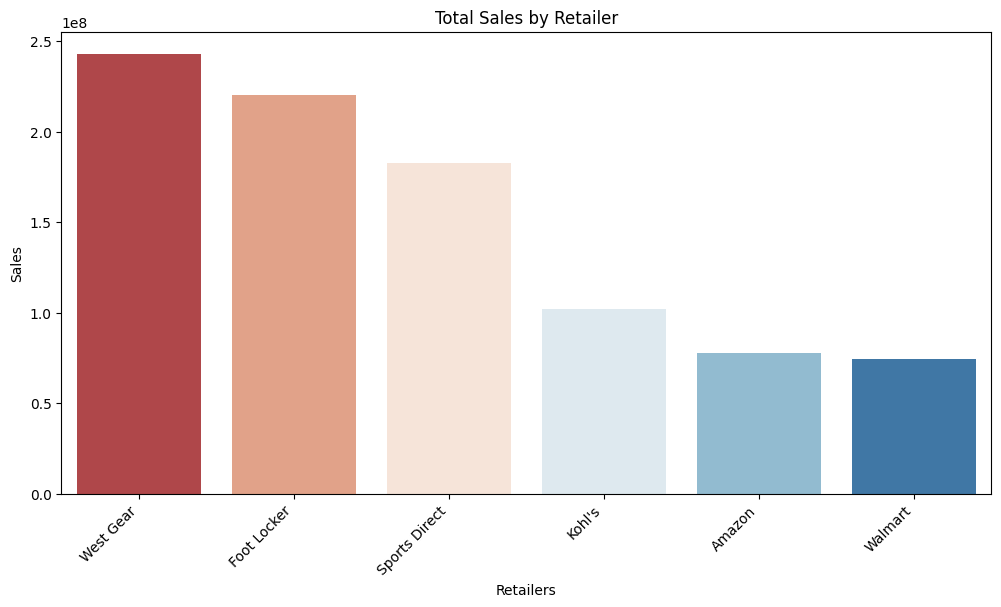

In [15]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Retailer', y = 'Total_Sales', data = sales_by_retailer, palette = 'RdBu')
plt.title('Total Sales by Retailer')
plt.xlabel('Retailers')
plt.ylabel('Sales')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

---

#### 4.5 Total Sales BY Sales Method

In [10]:
sales_method = df.groupby('Sales_Method')['Total_Sales'].sum().sort_values(ascending = False).reset_index()

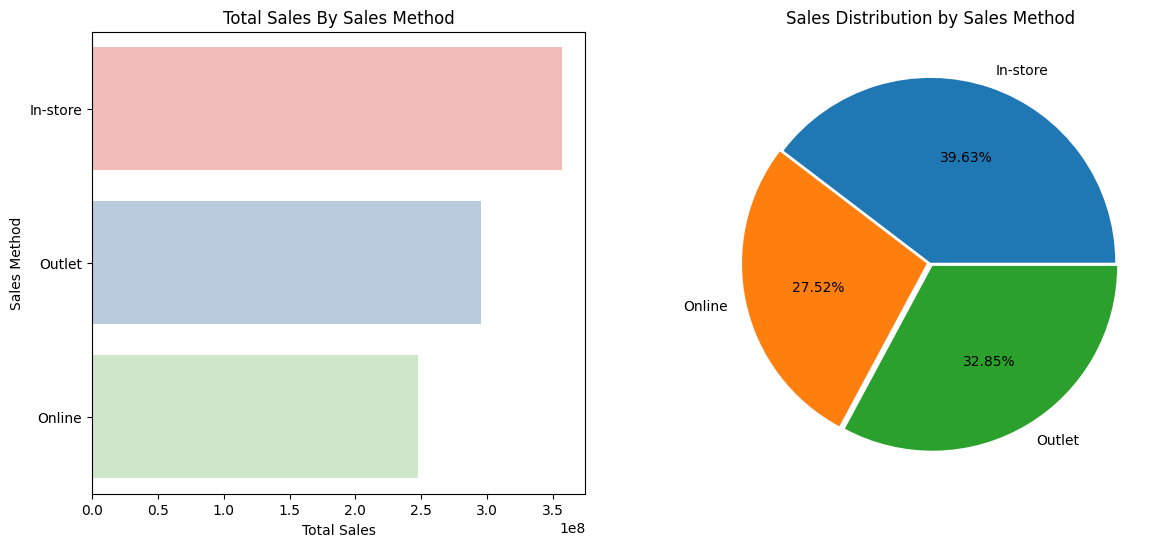

In [32]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.barplot(x = 'Total_Sales', y = 'Sales_Method', data = sales_method, palette = 'Pastel1')
plt.xlabel('Total Sales')
plt.ylabel('Sales Method')
plt.title('Total Sales By Sales Method')

#pie chart
plt.subplot(1, 2, 2)
Salesmethod = df.groupby('Sales_Method')['Total_Sales'].sum()
Salesmethod.plot(kind = 'pie', autopct='%1.2f%%', explode = [0, 0.02, 0.02])
plt.ylabel('')
plt.title('Sales Distribution by Sales Method')
plt.show()

---

#### 4.6 Top-10 States with Highest Sales

In [21]:
top_10_states = df.groupby('State')['Total_Sales'].sum().sort_values(ascending = False).reset_index()[:10]

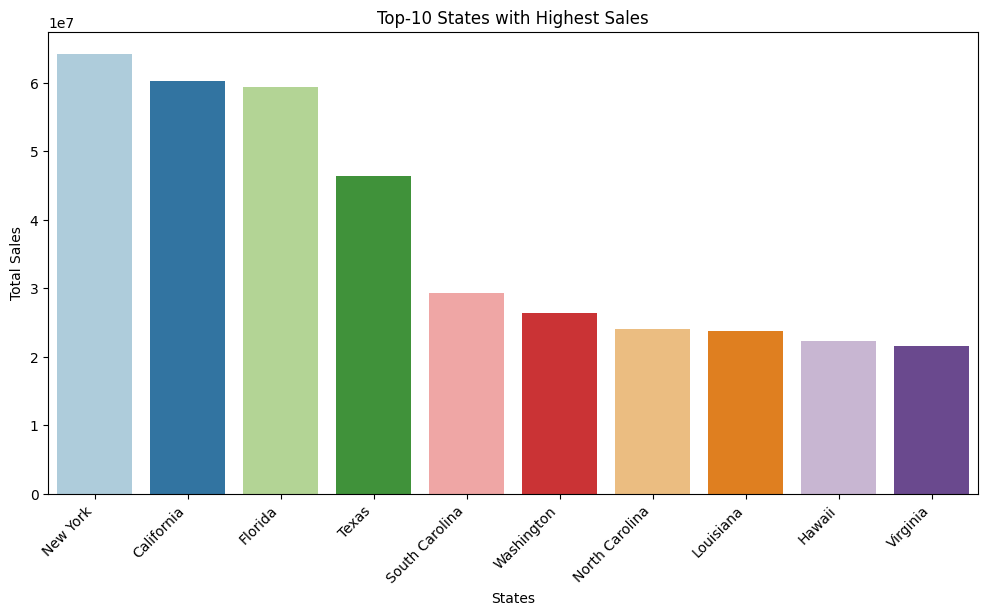

In [33]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'State', y = 'Total_Sales', data = top_10_states, palette = 'Paired')
plt.xlabel('States')
plt.ylabel('Total Sales')
plt.title('Top-10 States with Highest Sales')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

### 5. Conclusion and Insights

### 📌*Key Insights from Adidas Sales EDA :*

- Sales saw a dramatic increase across all categories around January 2021, remained consistently higher than in 2020, and peaked around July 2021 for most categories and Men's Street Footwear (purple line) consistently showed the highest sales performance, particularly after 2021.
- Bar Chart shows the West region dominates with highest sales (∼2.7 × 10⁸) Northeast follows as the second-strongest region.
- West Gear is the top performer with sales around 2.4 × 10⁸ and Traditional retailers (Walmart, Amazon, Kohl's) show lower sales volumes.
- In-store sales lead with 39.63% of total sales (around 3.5 × 10⁸ units), followed by outlet sales at 32.85% and online sales at 27.52%, indicating a relatively balanced distribution across all three channels, though traditional retail continues to dominate despite digital transformation.
- New York leads with approximately 6.5 × 10⁷ units, followed by California and Florida, highlighting the dominance of coastal states, while a significant drop in sales occurs after the top four; regional clusters emerge (e.g., North and South Carolina in the top 10), with Hawaii's presence standing out given its population size.
- There's a clear preference for street footwear over athletic footwear and Physical retail (in-store + outlet) dominates with over 70% of sales.